In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools as itt

/home/mendozah/workspace/envHDMp/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
idx = pd.IndexSlice

#Styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.rc('text', usetex=False)
plt.rc('font', size=20.0, family='serif')

In [8]:
# key -> dataset code, name -> dataset name
dataset_dict = {'1128_bac': 'OVA_Breast', '554_bac':'MNIST', '46_bac':'Splice'}

In [9]:
[dataset_dict.get(k) for k in dataset_dict]

['MNIST', 'OVA_Breast', 'Splice']

In [3]:
# From my opinion very sloppy way to do it
clear_name = lambda X: X.split(':')[-1] if X.split(':')[0] == 'classifier' else X.split(':')[0]

In [4]:
base_data_dir = '/mhome/mendozah/constrained_DeepNet_Configs/'
solvers = ['adam', 'adadelta', 'adagrad', 'nesterov', 'sgd', 'momentum']
solvers_dirs = list(map(lambda X: X + '_results', solvers))
policies = ['fixed', 'inv', 'exp', 'step']
interesting_params = [ 'response', 'solver', 'learning_rate', 'beta1', 'beta2', 'momentum',
                      'lambda2', 'lr_policy','gamma', 'power', 'epoch_step']

## Parameter importance plotting

In [5]:
import pyfanova.fanova

In [182]:
reload(pyfanova.fanova)

<module 'pyfanova.fanova' from '/home/mendozah/workspace/fanova/pyfanova/fanova.pyc'>

In [6]:
activation_dir = "/mhome/mendozah/implementation_Experiment/activation_results/merged_runs"

In [8]:
fano_activation = pyfanova.fanova.Fanova(activation_dir)

In [21]:
max_marginals = 15
cols_imp_df = ['marginal', 'parameter']

In [22]:
plot_df = pd.DataFrame(fano_activation.print_all_marginals(max_num=max_marginals, pairwise=True), columns=cols_imp_df)
print("======================= DONE =======================")

Sum of fractions for main effects 28.20%
Sum of fractions for pairwise interaction effects 26.59%
16.96% due to main effect: classifier:DeepFeedNet:num_layers
2.20% due to main effect: classifier:DeepFeedNet:activation
2.00% due to main effect: classifier:DeepFeedNet:batch_size
1.75% due to interaction: classifier:DeepFeedNet:num_layers x classifier:DeepFeedNet:activation
1.13% due to interaction: classifier:DeepFeedNet:num_layers x classifier:DeepFeedNet:batch_size
1.08% due to interaction: classifier:DeepFeedNet:num_layers x classifier:DeepFeedNet:learning_rate
1.06% due to interaction: classifier:DeepFeedNet:solver x classifier:DeepFeedNet:num_layers
1.04% due to main effect: classifier:DeepFeedNet:solver
0.88% due to interaction: classifier:DeepFeedNet:num_units_layer_1 x classifier:DeepFeedNet:num_layers
0.77% due to main effect: classifier:DeepFeedNet:learning_rate
0.76% due to interaction: classifier:DeepFeedNet:number_updates x classifier:DeepFeedNet:num_layers
0.73% due to int

In [27]:
plot_df.loc[:, ['parameter']] = plot_df.parameter.str.split(' x ')

In [28]:
plot_df

,marginal,parameter
0,16.956895,[classifier:DeepFeedNet:num_layers]
1,2.200017,[classifier:DeepFeedNet:activation]
2,2.001681,[classifier:DeepFeedNet:batch_size]
3,1.751870,"[classifier:DeepFeedNet:num_layers, classifier..."
4,1.125681,"[classifier:DeepFeedNet:num_layers, classifier..."
5,1.084587,"[classifier:DeepFeedNet:num_layers, classifier..."
6,1.062004,"[classifier:DeepFeedNet:solver, classifier:Dee..."
7,1.041408,[classifier:DeepFeedNet:solver]
8,0.881415,"[classifier:DeepFeedNet:num_units_layer_1, cla..."
9,0.765806,[classifier:DeepFeedNet:learning_rate]


### Plot now the marginals. Columns is the order and row is the policy

In [13]:
import pyfanova.visualizer

In [240]:
reload(pyfanova.visualizer)

<module 'pyfanova.visualizer' from '/home/mendozah/workspace/fanova/pyfanova/visualizer.py'>

In [14]:
viz_activation = pyfanova.visualizer.Visualizer(fano_activation)

DAMN SON
param1: classifier:DeepFeedNet:num_layers and param2: classifier:DeepFeedNet:activation
DAMN SON
param1: classifier:DeepFeedNet:solver and param2: classifier:DeepFeedNet:num_layers
DAMN SON
param1: classifier:DeepFeedNet:num_units_layer_1 and param2: classifier:DeepFeedNet:num_layers
DAMN SON
param1: classifier:DeepFeedNet:number_updates and param2: classifier:DeepFeedNet:num_layers
DAMN SON
param1: classifier:DeepFeedNet:solver and param2: classifier:DeepFeedNet:activation


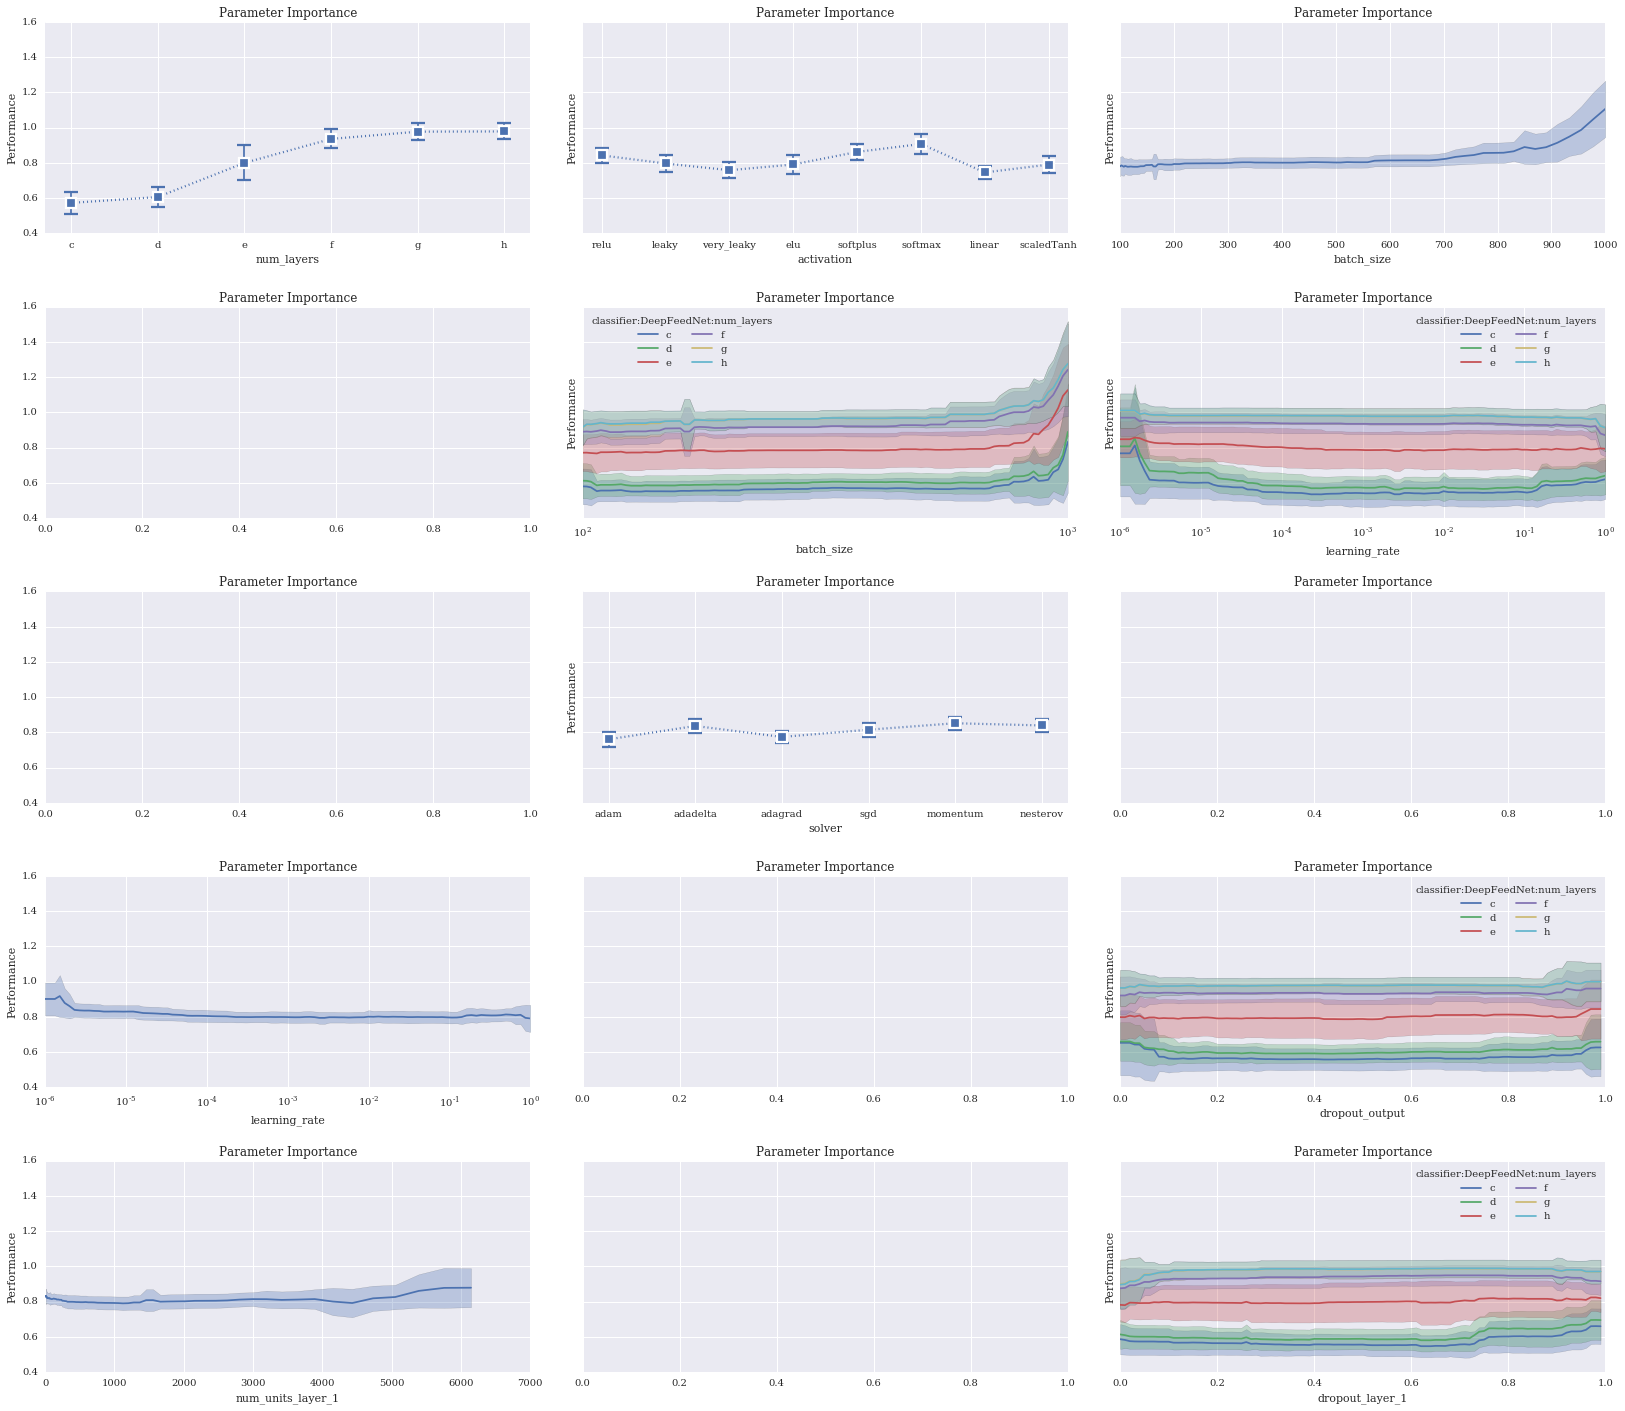

In [46]:
fig_hyper, axh = plt.subplots(nrows=5, ncols=3, figsize=(23., 20.), sharey=True)
for ax, p in zip(axh.flat, plot_df.parameter):
    categorical_params = fano_activation.get_config_space().get_categorical_parameters()
    if len(p) == 1:
        if p[0] not in categorical_params:
            viz_activation.plot_marginal(p[0], ax=ax)
        else:
            viz_activation.plot_categorical_marginal(p[0],ax=ax)    
        ax.set_xlabel(clear_name(p[0]))
    else:
        if (p[0] in categorical_params) and (p[1] not in categorical_params):
            viz_activation.plot_categorical_pairwise(p[0], p[1], ax=ax)
            ax.set_xlabel(clear_name(p[1]))
        elif (p[0] not in categorical_params) and (p[1] not in categorical_params):
            viz_activation.plot_contour_pairwise(param_1=p[0], param_2=p[1], ax=ax)
            ax.set_xlabel(clear_name(p[1]))
        else:
            print('DAMN SON')
            print('param1: %s and param2: %s' % (p[0],p[1]))
            pass
    ax.set_title('Parameter Importance')
plt.tight_layout()
fig_hyper.savefig(os.path.join('images', str(max_marginals) + '_Most_Important_Params_on_MNIST.png'))

In [43]:
print("%s and %s" % (plot_df.parameter[3],"eaaea"))

['classifier:DeepFeedNet:num_layers', 'classifier:DeepFeedNet:activation'] and eaaea


In [ ]:
s = len(importance_params)
fig_effect, axp = plt.subplots(nrows=int(np.ceil(s/3.)), ncols=3, figsize=(15., 12.), sharey=True)
for ax, name in zip(axp.flat, importance_params):
    viz_MNIST.plot_marginal('classifier:AdamInvConstFeedNet:' + name, ax=ax)
    ax.set_xlabel(name)
fig_effect.suptitle('Hyperparameter Importance')
#fig_effect.savefig('images_'+ dataset_name +'joint_distro_lr_response.png')
plt.tight_layout()

In [ ]:
ax_params = viz_MNIST.plot_pairwise_marginal('classifier:AdamInvConstFeedNet:beta1',
                                             'classifier:AdamInvConstFeedNet:lambda2', resolution=50)

In [ ]:
s = len(importance_params)
fig_interaction, axi = plt.subplots(nrows=int(np.ceil(s/3.)), ncols=3, figsize=(22., 15.), sharey=True)
for ax, name in zip(axi.flat, importance_params):
    viz_MNIST.plot_contour_pairwise('classifier:AdamInvConstFeedNet:' + name,
                                    'classifier:AdamInvConstFeedNet:lambda2',
                                    bounds_1=(0.0, 1.0), bounds_2=(0.0, 1.0),
                                    log_scale_1=False, log_scale_2=True,
                                    resolution=10, ax=ax)
    ax.set_ylabel('lambda2')
    ax.set_xlabel(name)
fig_interaction.suptitle('Hyperparameter Interaction')
#fig_kde.savefig('images_'+ dataset_name +'joint_distro_lr_response.png')
plt.tight_layout()